<a href="https://colab.research.google.com/github/Q-nicorn1/Sentence-Word-Embedding-/blob/main/Sentence_Encoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip3 install sentencepiece

     |████████████████████████████████| 1.2 MB 7.6 MB/s 


In [10]:
import sentencepiece as spm
import tensorflow_hub as hub

from absl import logging

import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import re
import seaborn as sns

#### Universal Sentence Encoder - Version 4

In [17]:
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")
embeddings = embed([
    "That person is a real star",
    "I did not know the sun was a star",
    "twinkle twinkle little star",
    "please have this star shaped cake"
    ])

print(embeddings)

tf.Tensor(
[[ 0.06905187 -0.00581731 -0.04462374 ... -0.07636578  0.0591777
   0.02199684]
 [ 0.01424944 -0.05419916  0.06299304 ... -0.03608732 -0.00037949
   0.04288629]
 [ 0.03047851 -0.01363901  0.08402601 ... -0.05086662 -0.01263583
   0.03433083]
 [-0.00154395  0.02722767  0.01792383 ... -0.03855469 -0.00705059
  -0.04853749]], shape=(4, 512), dtype=float32)


In [18]:
url = "https://tfhub.dev/google/universal-sentence-encoder/4" 
model = hub.load(url)
print ("module %s loaded" % url)
def embed(input):
  return model(input)

module https://tfhub.dev/google/universal-sentence-encoder/4 loaded


In [20]:
def plot_similarity(labels, features, rotation):
  corr = np.inner(features, features)
  sns.set(font_scale=1.2)
  g = sns.heatmap(
      corr,
      xticklabels=labels,
      yticklabels=labels,
      vmin=0,
      vmax=1,
      cmap="YlOrRd")
  g.set_xticklabels(labels, rotation=rotation)
  g.set_title("Semantic Textual Similarity")

def run_and_plot(messages_):
  message_embeddings_ = embed(messages_)
  plot_similarity(messages_, message_embeddings_, 90)

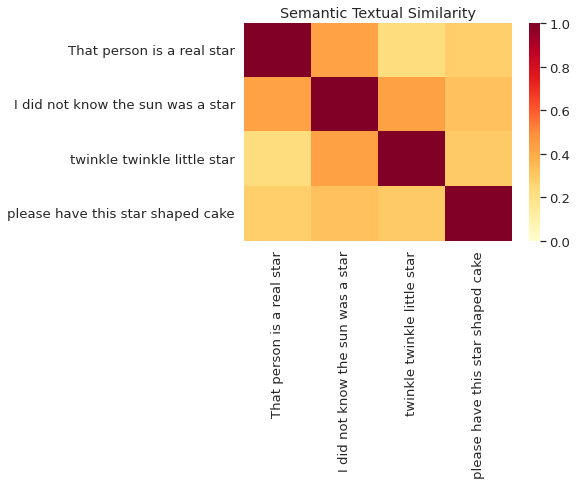

In [23]:
messages = [
    "That person is a real star",
    "I did not know the sun was a star",
    "twinkle twinkle little star",
    "please have this star shaped cake"
]

run_and_plot(messages)   